## Part 0

Study the evolution over time of the min, max and average temperatures computed over one month.


In [1]:
# Import all the necessary libaries
library(ggplot2)
library(dplyr)
library(tidyr)
library(extraDistr)     # for rcauchy
library(posterior)      # for posterior samples
library(gridExtra)      # for arranging plots
library(scales)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'backports':
  method                    from 
  as.character.Rconcordance tools
  print.Rconcordance        tools

This is posterior version 1.6.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
# Load the CSV files
A <- read.csv("AuronzoDiCadore.csv")
C <- read.csv("CastelfrancoVeneto.csv")
P <- read.csv("PortoTolle.csv")
R <- read.csv("Roverchiara.csv")

# first remove eventual missing values/ NA


A <- drop_na(A, Min, Avg, Max)
C <- drop_na(C, Min, Avg, Max)
P <- drop_na(P, Min, Avg, Max)
R <- drop_na(R, Min, Avg, Max)


In [5]:
tail(A); head(C); head(P); head(R)


Year Month Min  Avg  Max 
355 2023  7    11.6 17.7 25.4
356 2023  8    11.3 17.4 25.3
357 2023  9     8.6 14.7 23.1
358 2023 10     5.7 10.4 16.7
359 2023 11    -2.1  1.5  7.1
360 2023 12    -4.0 -1.0  3.3

Year Month Min  Avg  Max 
1 1994 1     -0.5  4.1  9.6
2 1994 2     -1.4  3.3  8.5
3 1994 3      4.1 10.3 16.9
4 1994 4      5.6 11.2 16.3
5 1994 5     11.5 17.2 22.6
6 1994 6     14.9 20.9 27.3

Year Month Min  Avg  Max 
1 1994 1      0.8  4.6  8.6
2 1994 2      1.0  4.7  8.5
3 1994 3      5.0 10.5 16.7
4 1994 4      7.4 11.8 16.4
5 1994 5     11.7 17.2 21.9
6 1994 6     15.8 21.0 26.0

Year Month Min  Avg  Max 
1 1994 1      0.4  4.0  8.8
2 1994 2      0.0  3.9  8.4
3 1994 3      4.0 10.7 18.3
4 1994 4      5.6 11.2 17.0
5 1994 5     10.8 17.3 23.1
6 1994 6     14.0 20.9 27.6

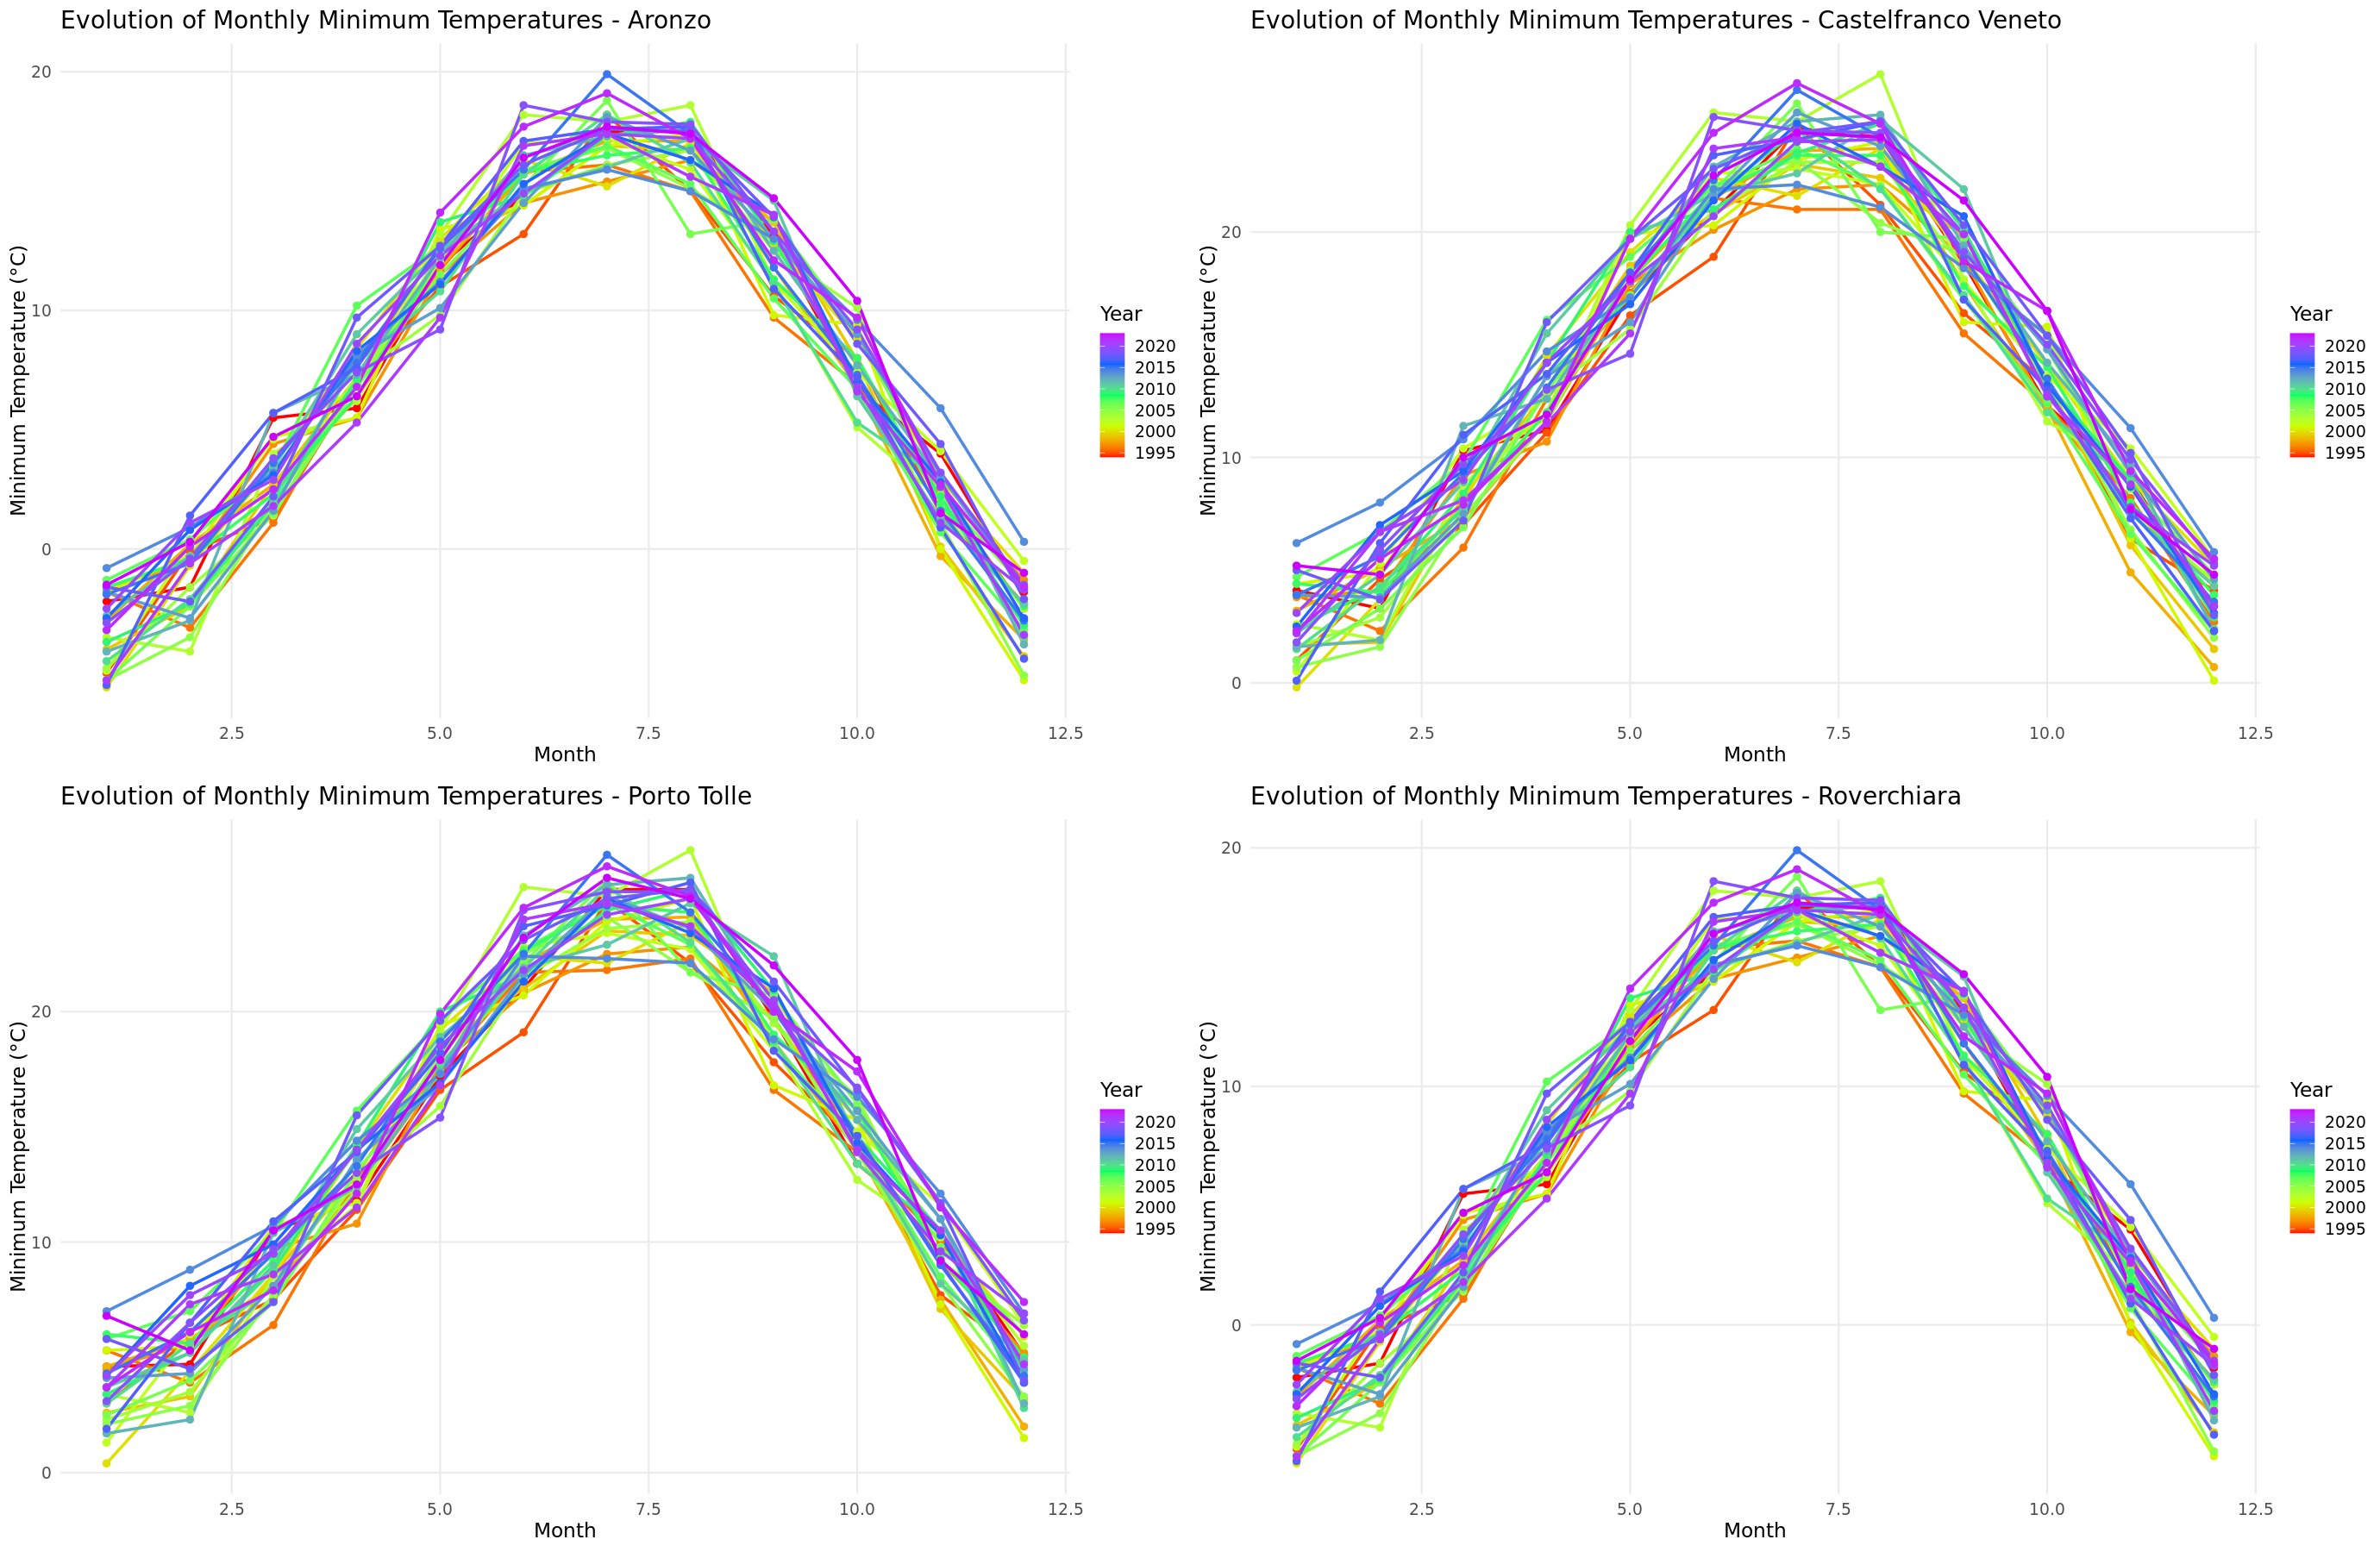

In [11]:
# Plot With a color gradient the evolution of the avg temperatures over the year

A <- A %>% arrange(Year, Month)
C <- C %>% arrange(Year, Month)
P <- P %>% arrange(Year, Month)
R <- R %>% arrange(Year, Month)

# Plot
p1 <- ggplot(A, aes(x = Month, y = Avg, group = Year, color = Year)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_color_gradientn(
    colors = rainbow(5),  # or use: scale_color_viridis_c()
    name = "Year"
  ) +
  labs(
    title = "Evolution of Monthly Minimum Temperatures - Aronzo",
    x = "Month",
    y = "Minimum Temperature (°C)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.background = element_rect(fill = "white", color = NA),
    panel.grid.minor = element_blank()
  )

p2 <- ggplot(C, aes(x = Month, y = Avg, group = Year, color = Year)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_color_gradientn(
    colors = rainbow(5),  # or use: scale_color_viridis_c()
    name = "Year"
  ) +
  labs(
    title = "Evolution of Monthly Minimum Temperatures - Castelfranco Veneto",
    x = "Month",
    y = "Minimum Temperature (°C)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.background = element_rect(fill = "white", color = NA),
    panel.grid.minor = element_blank()
  )


p3 <- ggplot(P, aes(x = Month, y = Avg, group = Year, color = Year)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_color_gradientn(
    colors = rainbow(5),  # or use: scale_color_viridis_c()
    name = "Year"
  ) +
  labs(
    title = "Evolution of Monthly Minimum Temperatures - Porto Tolle",
    x = "Month",
    y = "Minimum Temperature (°C)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.background = element_rect(fill = "white", color = NA),
    panel.grid.minor = element_blank()
  )


p4 <- ggplot(A, aes(x = Month, y = Avg, group = Year, color = Year)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_color_gradientn(
    colors = rainbow(5),  # or use: scale_color_viridis_c()
    name = "Year"
  ) +
  labs(
    title = "Evolution of Monthly Minimum Temperatures - Roverchiara",
    x = "Month",
    y = "Minimum Temperature (°C)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.background = element_rect(fill = "white", color = NA),
    panel.grid.minor = element_blank()
  )
  
options(repr.plot.width = 23, repr.plot.height = 15)
# Arrange all four plots in 2 rows, 2 columns
grid.arrange(p1, p2,
             p3, p4,
             ncol = 2)


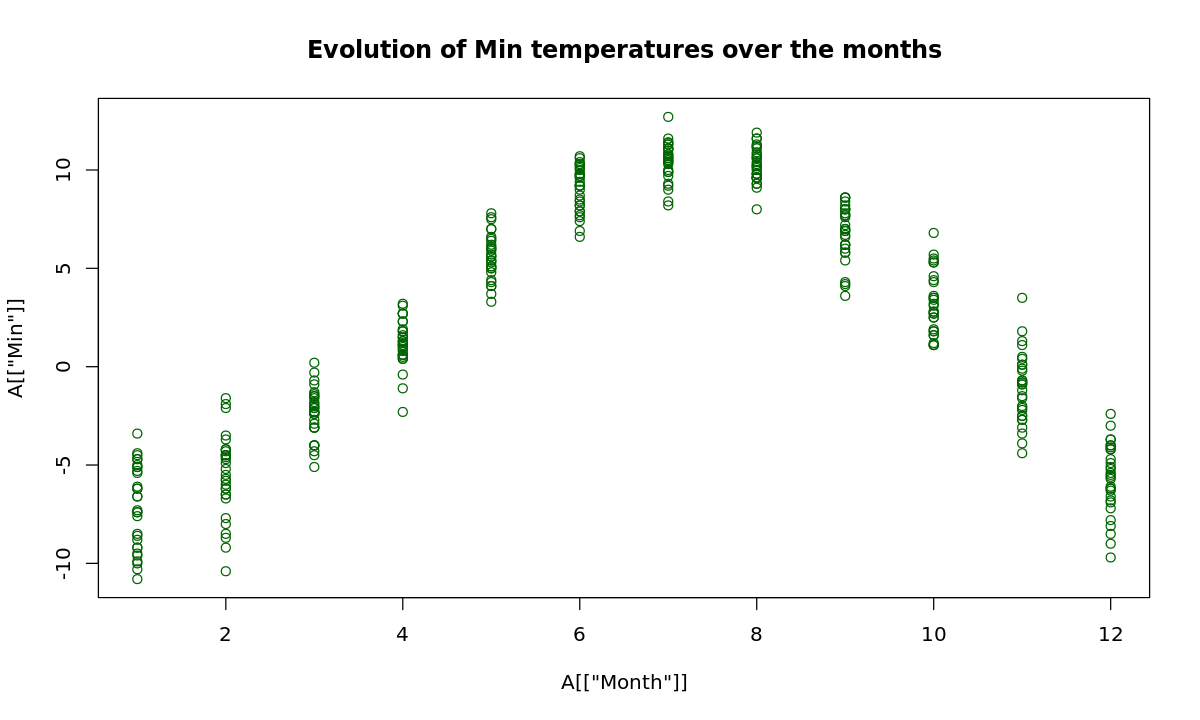

In [ ]:
par(bg= "white")
options(repr.plot.width = 10, repr.plot.height = 6)

plot(y = A[["Min"]], x = A[["Month"]], col = "darkgreen", main = "Evolution of Min temperatures over the months")


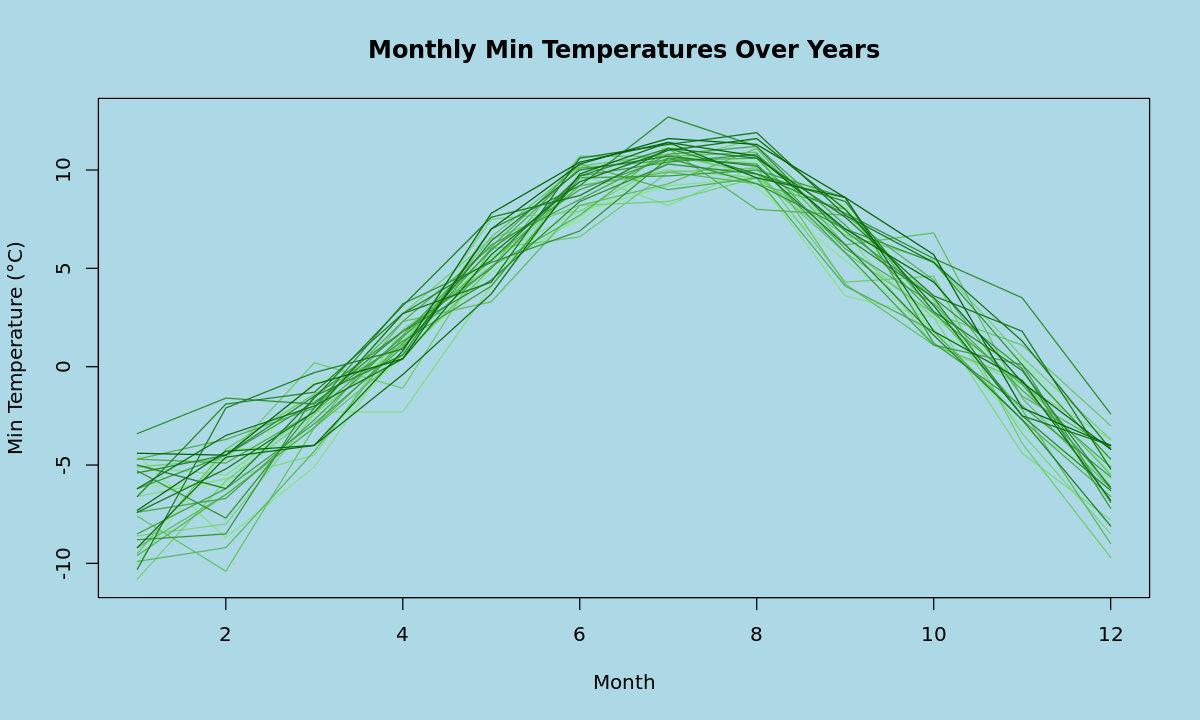

In [108]:

par(bg = "lightblue")
years <- sort(unique(A$Year))

# Generate a color gradient (e.g., from blue to red)
colors <- colorRampPalette(c("lightgreen", "darkgreen"))(length(years))

options(repr.plot.width = 10, repr.plot.height = 6)

# Set up empty plot
plot(1, type = "n", xlim = c(1, 12), ylim = range(A$Min, na.rm = TRUE),
     xlab = "Month", ylab = "Min Temperature (°C)", main = "Monthly Min Temperatures Over Years")

# Add lines for each year
for (i in seq_along(years)) {
  year_data <- A[A$Year == years[i], ]
  lines(x = year_data$Month, y = year_data$Min, col = colors[i])
}



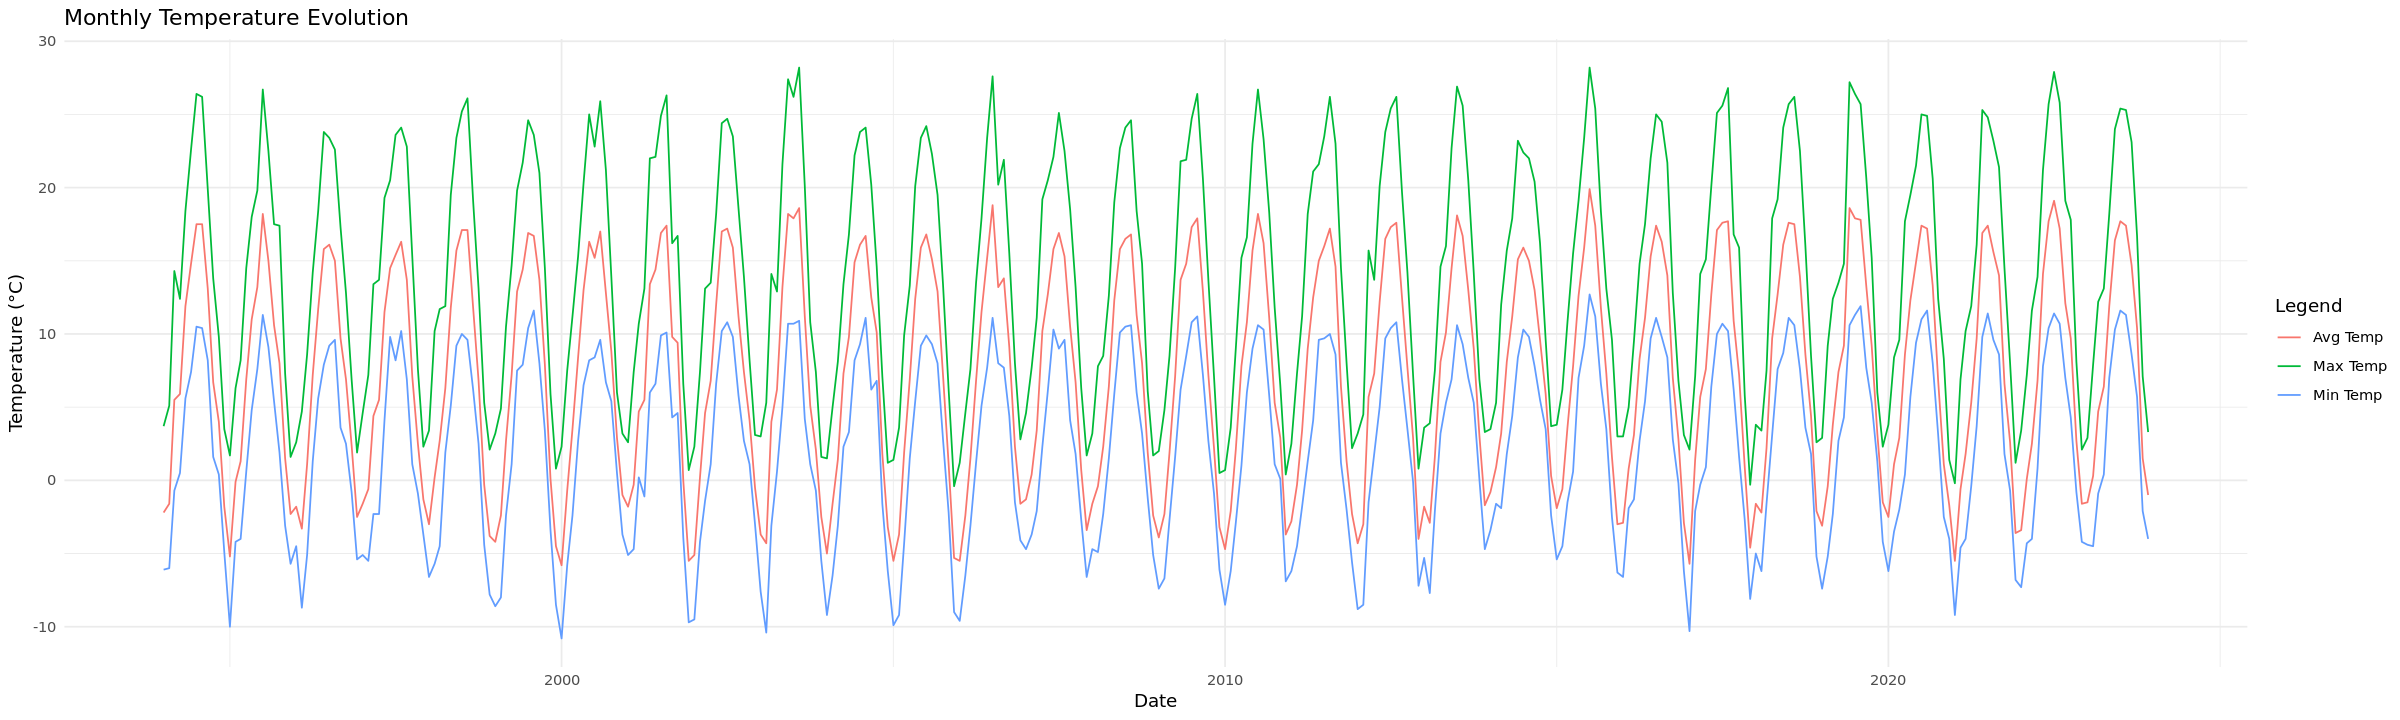

In [109]:
A$Date <- as.Date(paste(A$Year, A$Month, "01", sep = "-"), format = "%Y-%m-%d")
A <- A[order(A$Date), ]

options(repr.plot.width = 20, repr.plot.height = 6)

ggplot(A, aes(x = Date)) +
  geom_line(aes(y = Max, color = "Max Temp")) +
  geom_line(aes(y = Min, color = "Min Temp")) +
  geom_line(aes(y = Avg, color = "Avg Temp")) +
  labs(title = "Monthly Temperature Evolution",
       x = "Date",
       y = "Temperature (°C)",
       color = "Legend") +
  theme_minimal()


In [ ]:
# Do the above plot, one kind at the time to show that over the year it remained mostrly constant


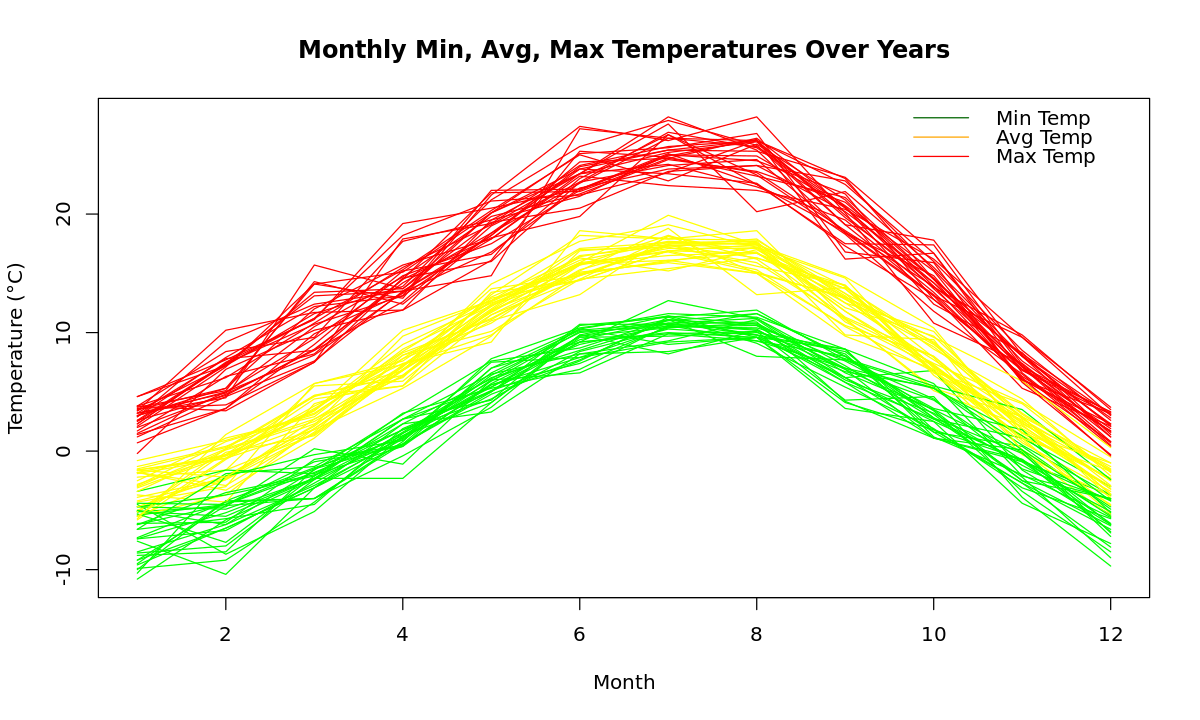

In [111]:
# Set background color
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)

# Set up an empty plot
plot(1, type = "n", xlim = c(1, 12),
     ylim = range(c(A$Min, A$Avg, A$Max), na.rm = TRUE),
     xlab = "Month", ylab = "Temperature (°C)",
     main = "Monthly Min, Avg, Max Temperatures Over Years")

# Get list of years
years <- sort(unique(A$Year))

# Loop through years, draw min/avg/max lines in fixed colors
for (year in years) {
  data_year <- A[A$Year == year, ]
  lines(data_year$Month, data_year$Min, col = "green")
  lines(data_year$Month, data_year$Avg, col = "yellow")
  lines(data_year$Month, data_year$Max, col = "red")
}

# Add a legend
legend("topright", legend = c("Min Temp", "Avg Temp", "Max Temp"),
       col = c("darkgreen", "orange", "red"), lty = 1, bty = "n")


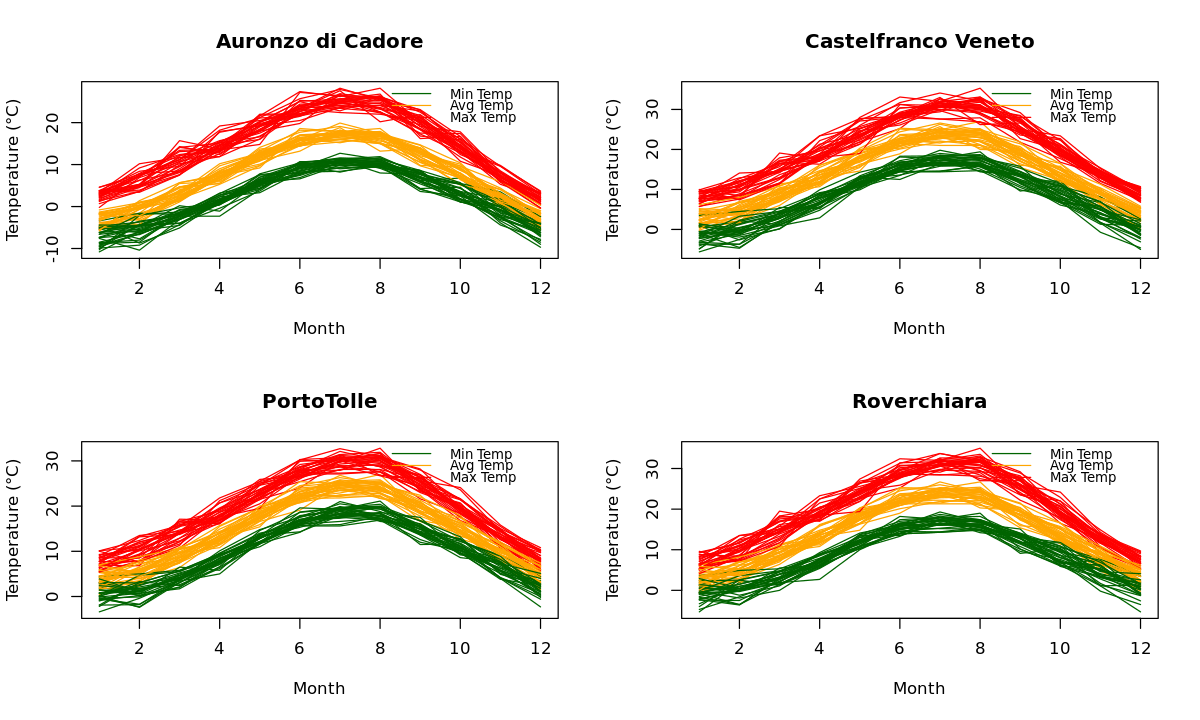

In [112]:
# Set white background
par(bg = "white")

# Split plotting area into 2 rows x 2 columns
par(mfrow = c(2, 2))

# Function to plot one city's data
plot_city <- function(df, city_name) {
  plot(1, type = "n", xlim = c(1, 12),
       ylim = range(c(df$Min, df$Avg, df$Max), na.rm = TRUE),
       xlab = "Month", ylab = "Temperature (°C)",
       main = paste(city_name))
  
  years <- sort(unique(df$Year))
  
  for (year in years) {
    data_year <- df[df$Year == year, ]
    lines(data_year$Month, data_year$Min, col = "darkgreen")
    lines(data_year$Month, data_year$Avg, col = "orange")
    lines(data_year$Month, data_year$Max, col = "red")
  }
  
  legend("topright", legend = c("Min Temp", "Avg Temp", "Max Temp"),
         col = c("darkgreen", "orange", "red"), lty = 1, bty = "n", cex = 0.8)
}

# Call the function for each city dataframe
options(repr.plot.width = 10, repr.plot.height = 6)

plot_city(A, "Auronzo di Cadore")
plot_city(C, "Castelfranco Veneto")
plot_city(P, "PortoTolle")
plot_city(R, "Roverchiara")


In [113]:
# Average value of the temperatures
# StdDev of the temperatures
# min temperature for type and max temp for type with the month and year


In [114]:
info <- function(df, city_name) {
  # Calcolo delle statistiche
  avgmin <- mean(df[["Min"]])
  avgavg <- mean(df[["Avg"]])
  avgmax <- mean(df[["Max"]])

  minmin <- min(df[["Min"]])
  minavg <- min(df[["Avg"]])
  minmax <- min(df[["Max"]])

  maxmin <- max(df[["Min"]])
  maxavg <- max(df[["Avg"]])
  maxmax <- max(df[["Max"]])

  result <- data.frame(
    "Monthly Max" = c(avgmax, minmax, maxmax),
    "Monthly Min" = c(avgmin, minmin, maxmin),
    "Monthly Avg" = c(avgavg, minavg, maxavg),
    row.names = c("Mean", "Minimum", "Maximum")
  )
  cat("\n", city_name, ":\n")
  result
}

info(A, "Auronzo di Cadore")
info(C, "Castelfranco Veneto")
info(P, "PortoTolle")
info(R, "Roverchiara")



 Auronzo di Cadore :


Monthly.Max Monthly.Min Monthly.Avg
Mean    14.15667      2.069167   7.288056  
Minimum -0.40000    -10.800000  -5.800000  
Maximum 28.20000     12.700000  19.900000


 Castelfranco Veneto :


Monthly.Max Monthly.Min Monthly.Avg
Mean    19.53972     7.906389   13.35722   
Minimum  5.70000    -5.600000   -0.20000   
Maximum 35.30000    19.800000   27.00000


 PortoTolle :


Monthly.Max Monthly.Min Monthly.Avg
Mean    18.92167     9.496667   14.08333   
Minimum  5.40000    -3.400000    0.40000   
Maximum 32.80000    21.100000   27.00000


 Roverchiara :


Monthly.Max Monthly.Min Monthly.Avg
Mean    19.29667     7.983333   13.43667   
Minimum  4.10000    -5.300000   -0.70000   
Maximum 35.00000    19.300000   26.70000

## Part 1
Analysis of the evolution of the annual average of the min, max and daily averate temperature over time
(1993 - 2021):

In [115]:
glimpse(A)


Rows: 360
Columns: 6
$ Year  <dbl> 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994…
$ Month <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9…
$ Min   <dbl> -6.1, -6.0, -0.7, 0.5, 5.6, 7.4, 10.5, 10.4, 8.2, 1.6, 0.4, -4.9…
$ Avg   <dbl> -2.2, -1.6, 5.5, 5.9, 11.9, 14.8, 17.5, 17.5, 13.1, 6.7, 4.0, -1…
$ Max   <dbl> 3.7, 5.1, 14.3, 12.4, 18.4, 22.6, 26.4, 26.2, 19.9, 13.8, 9.8, 3…
$ Date  <date> 1994-01-01, 1994-02-01, 1994-03-01, 1994-04-01, 1994-05-01, 199…


In [116]:
A_avg <- A %>% group_by(Year) %>% summarize(Min_mean = mean(Min), Max_mean = mean(Max), Avg_mean = mean(Avg))
glimpse(A_avg)


Rows: 30
Columns: 4
$ Year     <dbl> 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2…
$ Min_mean <dbl> 2.2416667, 1.1416667, 1.2666667, 1.7083333, 1.2916667, 1.5833…
$ Max_mean <dbl> 14.67500, 13.45833, 13.10000, 14.53333, 14.25000, 13.76667, 1…
$ Avg_mean <dbl> 7.608333, 6.508333, 6.525000, 7.283333, 6.866667, 6.783333, 7…


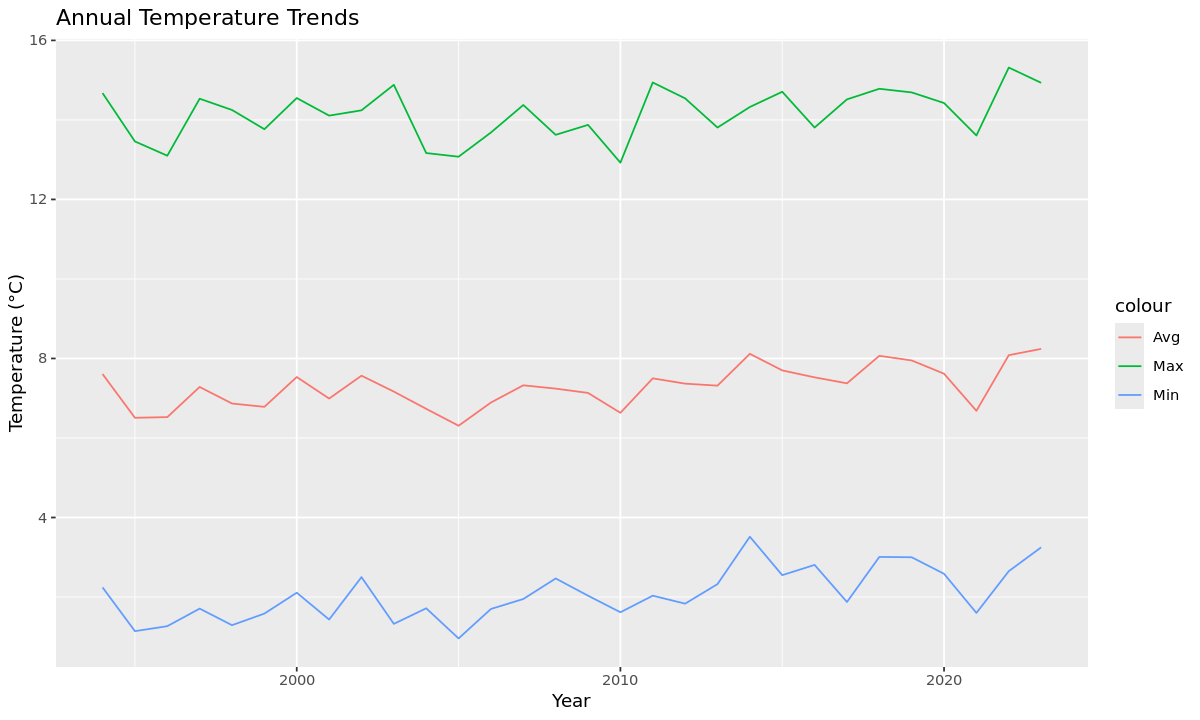

In [117]:

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(A_avg, aes(x = Year)) +
  geom_line(aes(y = Min_mean, color = "Min")) +
  geom_line(aes(y = Avg_mean, color = "Avg")) +
  geom_line(aes(y = Max_mean, color = "Max")) +
  labs(title = "Annual Temperature Trends", y = "Temperature (°C)")


• study the trend of the annual averages and compare them with a constant value or a rising trend
(for instance linear or quadratic)

 Basically the Idea here is to compare these annual averages with various behaviour:
 1. Costant Value\
 Basically the Average Temperatures behaves like a constant k + epsilon, where epsilon is some gaussian white noise 
 2. Rising Trend, linear\
 In this case we add a linear term, depending linearly to time.
 3. Rising Trend, quadratic\
 Here we use a quadratic term.

In [118]:
# To do the linear regression we will exploit the R build in function "lm" which does a frequentist regression exploiting the least squares method
# Constant Model
fit_const <- lm(Avg_mean ~ 1, data = A_avg)

# Linear model
fit_lin <- lm(Avg_mean ~ Year, data = A_avg)

# Quadratic Model
fit_quad <- lm(Avg_mean ~ poly(Year, 2), data = A_avg)


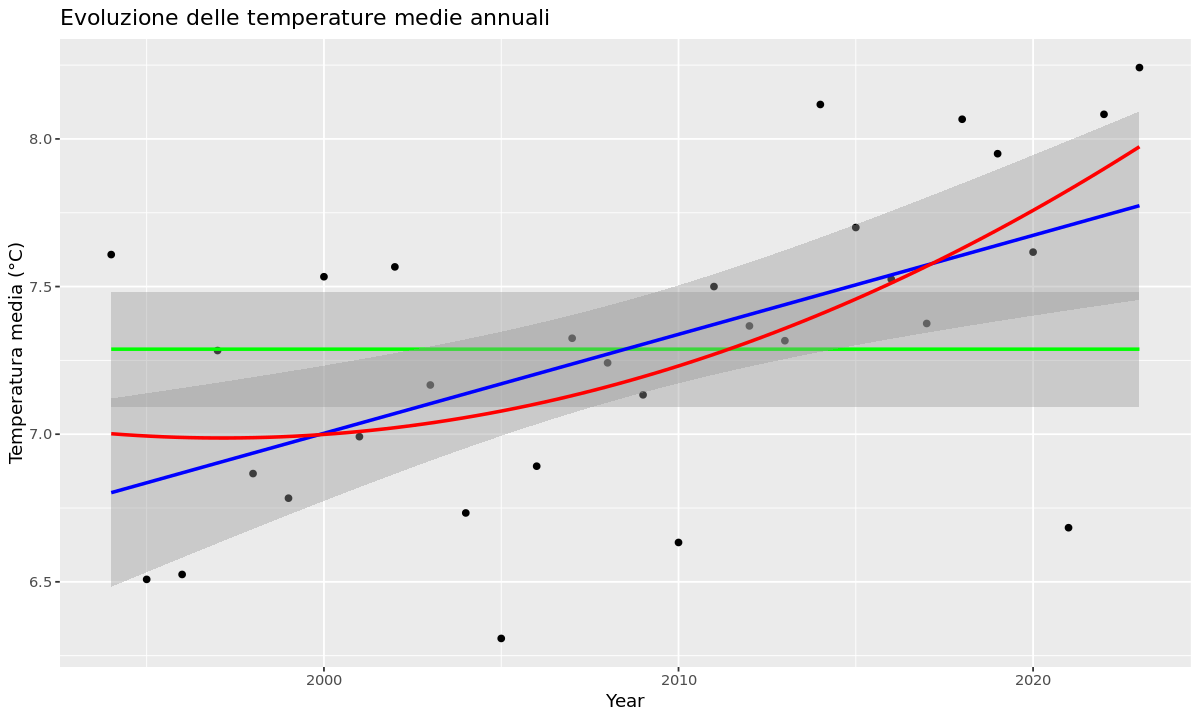

In [119]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(A_avg, aes(x = Year, y = Avg_mean)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ 1, color = "green", se = TRUE) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", se = TRUE) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "red", se = FALSE) +
  labs(title = "Evoluzione delle temperature medie annuali", y = "Temperatura media (°C)")


Anova explains the residual variance explained by these kind of nested model, allowing to formally verify if a model is significantly better.

In [120]:
anova(fit_const, fit_lin, fit_quad)

# RSS: Residual Variance not explained
# Pr(>F): P-value


Res.Df RSS      Df Sum of Sq F         Pr(>F)     
1 29     7.878150 NA       NA         NA          NA
2 28     5.353353  1 2.524798  13.468479 0.001052471
3 27     5.061414  1 0.291939   1.557342 0.222769472

From the result obtained is clear how the linear regression optimally fits the data, while the quadratic regression does not apport significant improvements.

### • perform an analysis using a Bayesian linear regression with JAGS or STAN

For the case Being we choose to use STAN. That's because JAGS is based off Gibbs sampling: a random walk over the space considered. This construction characteristic of the model makes so that it isn't well suited for dealing with high correlation parameters which is what we encounter here in this linear regression.\
We have therefore decided to use STAN, which treats the parameters space more like a physical system using the momentum to create smoother trajectories which converges more efficiently for systems having an high correlation.\
Therefore, since we have to deal with continous data, with high correlation, the latter is the better choice.

In [121]:
# To exploit the stan functionalities we are going to use the brms package
library(brms)

fit_linear <- brm(
  formula = Avg_mean ~ Year,    # This is basically the Likelihood, the relationship between the data I have
  data = A_avg,
  family = gaussian(),  # Error distribution for the likelihood, this completes the definition of the likelihood
  prior = c(
    prior(normal(0, 10), class = "Intercept"),    # These are all the Priors for our analysis An alternative could be normal(0,10)
    prior(normal(0, 10), class = "b"),    # The idea is that the intercept and the slope could have any values so to not give any constraints we choose a normal with a very high variance (an uniform prior would be bounded between 0, 1)
    prior(cauchy(0, 5), class = "sigma")    # The third parameter is the variability (standard deviation) of the noise, and tells how much the data is expected to oscillate around the regression line, must be > 0.
  ),
  iter = 5000, warmup = 1000, chains = 4, cores = 4  # Iter: total number of iteration for each mcmc chain, warmup: the first 1000 iterations are discarded, chains: number of chains,
)



Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: Avg_mean ~ Year 
   Data: A_avg (Number of observations: 30) 
  Draws: 4 chains, each with iter = 5000; warmup = 1000; thin = 1;
         total post-warmup draws = 16000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   -59.76     19.47   -98.17   -21.14 1.00    16227    11518
Year          0.03      0.01     0.01     0.05 1.00    16230    11530

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.46      0.06     0.35     0.60 1.00    11820    10427

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

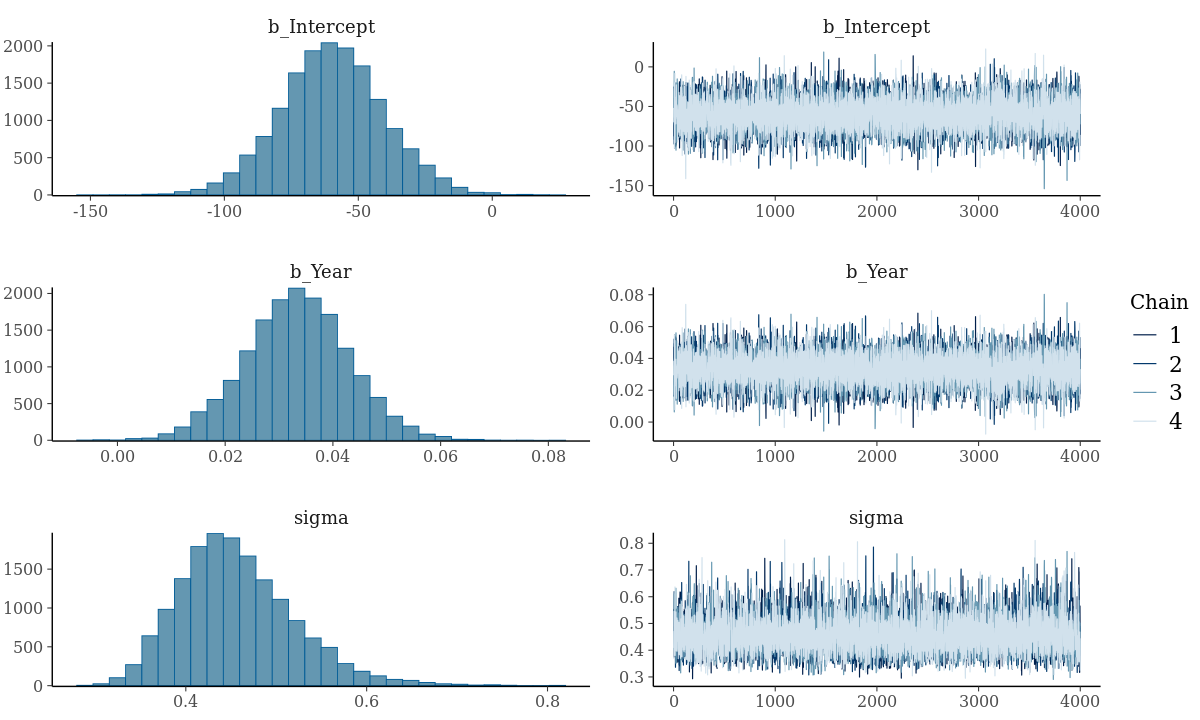

In [122]:
summary(fit_linear)
plot(fit_linear)


Using 10 posterior draws for ppc type 'dens_overlay' by default.



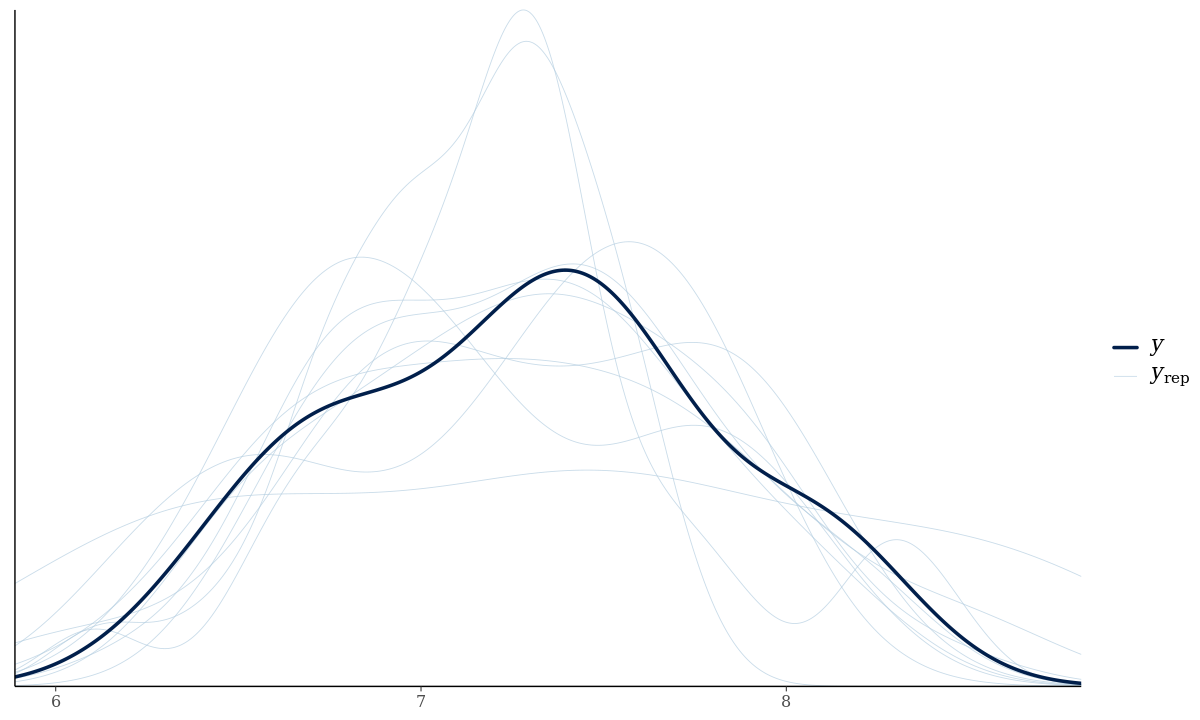

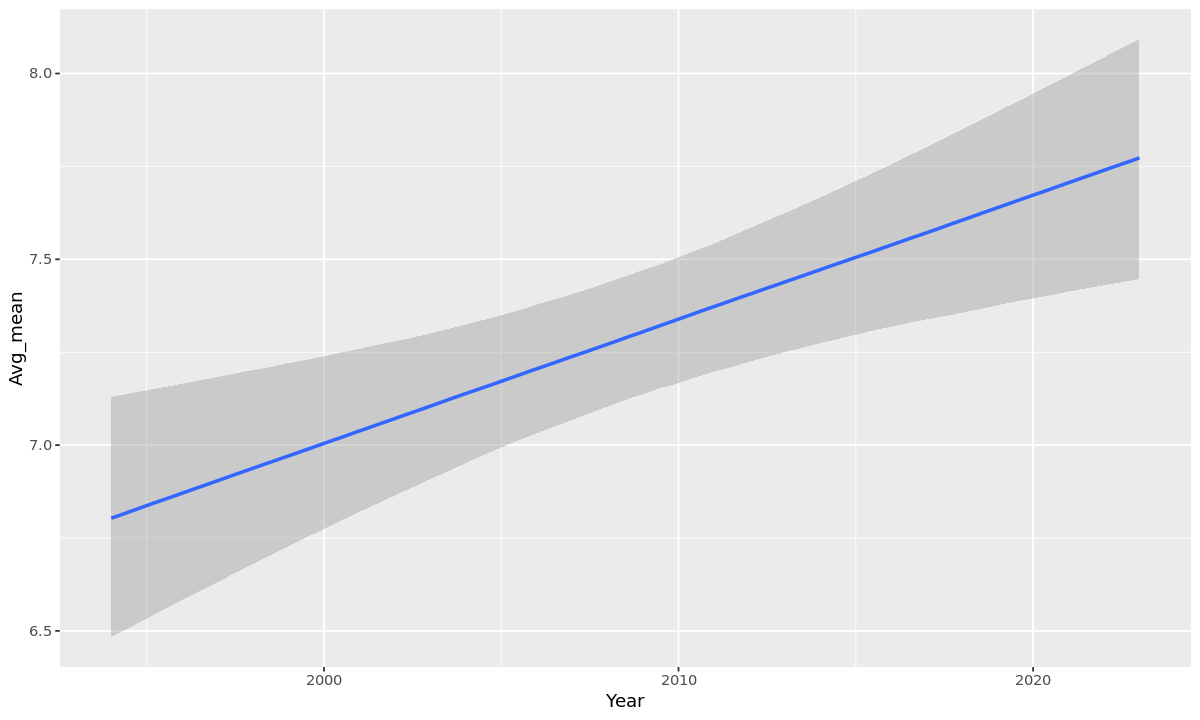

In [123]:
pp_check(fit_linear)  # posterior check plot; Overlays the posterior obtained with the data given, with the distributions of simulated values. The simulated data matches enoughly well the data given.
conditional_effects(fit_linear)  # visualize a plot of the regression with a confidence interval overlay


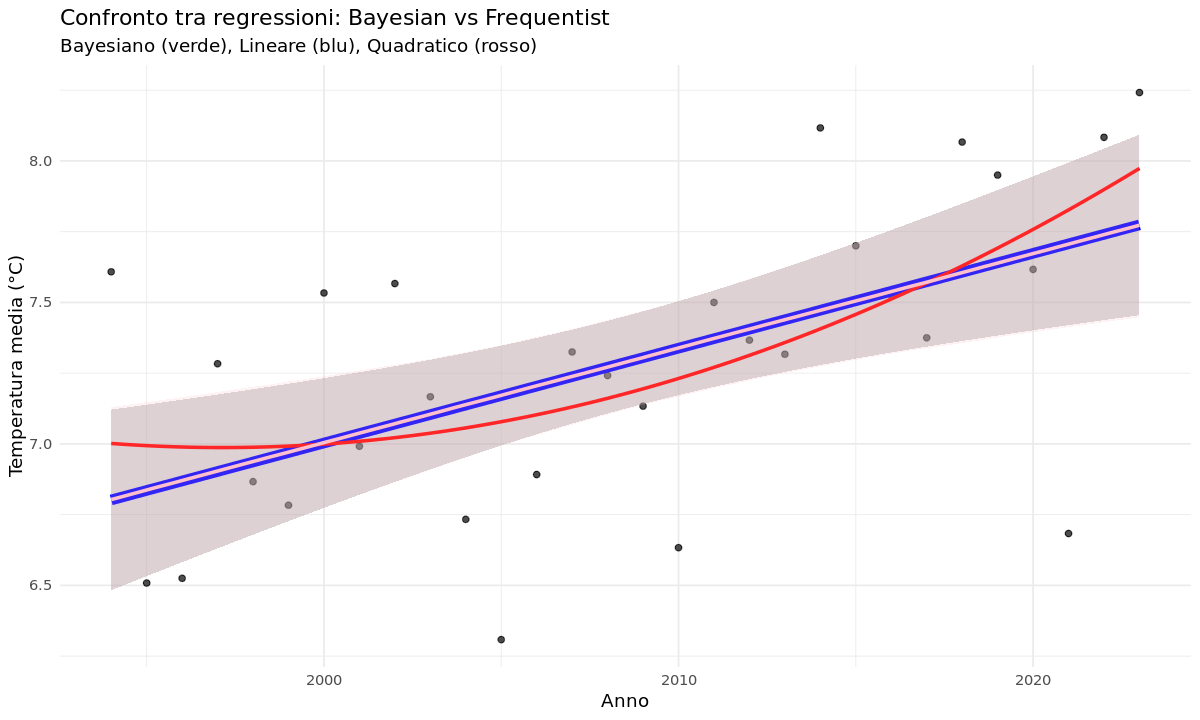

In [124]:
# 1. Extract Bayesian regression line + CI from conditional_effects
bayes_eff <- conditional_effects(fit_linear)
bayes_df <- as.data.frame(bayes_eff$Year)

options(repr.plot.width = 10, repr.plot.height = 6)

# 2. Create comparison plot
ggplot(A_avg, aes(x = Year, y = Avg_mean)) +
  geom_point(alpha = 0.7) +
  
  # Frequentist linear regression (blue)
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", size = 3.0, se = TRUE) +
  
  # Frequentist quadratic regression (red)
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "red", se = FALSE) +
  
  # Bayesian regression (green, thick line with ribbon)
  geom_ribbon(data = bayes_df, aes(x = Year, ymin = lower__, ymax = upper__), 
              fill = "pink", alpha = 0.2, inherit.aes = FALSE) +
  geom_line(data = bayes_df, aes(x = Year, y = estimate__), 
            color = "pink", size = 1.0, inherit.aes = FALSE) +
  
  labs(
    title = "Confronto tra regressioni: Bayesian vs Frequentist",
    subtitle = "Bayesiano (verde), Lineare (blu), Quadratico (rosso)",
    x = "Anno", y = "Temperatura media (°C)"
  ) +
  theme_minimal()


Warning message:
“Removed 534 rows containing non-finite outside the scale range
(`stat_density()`).”


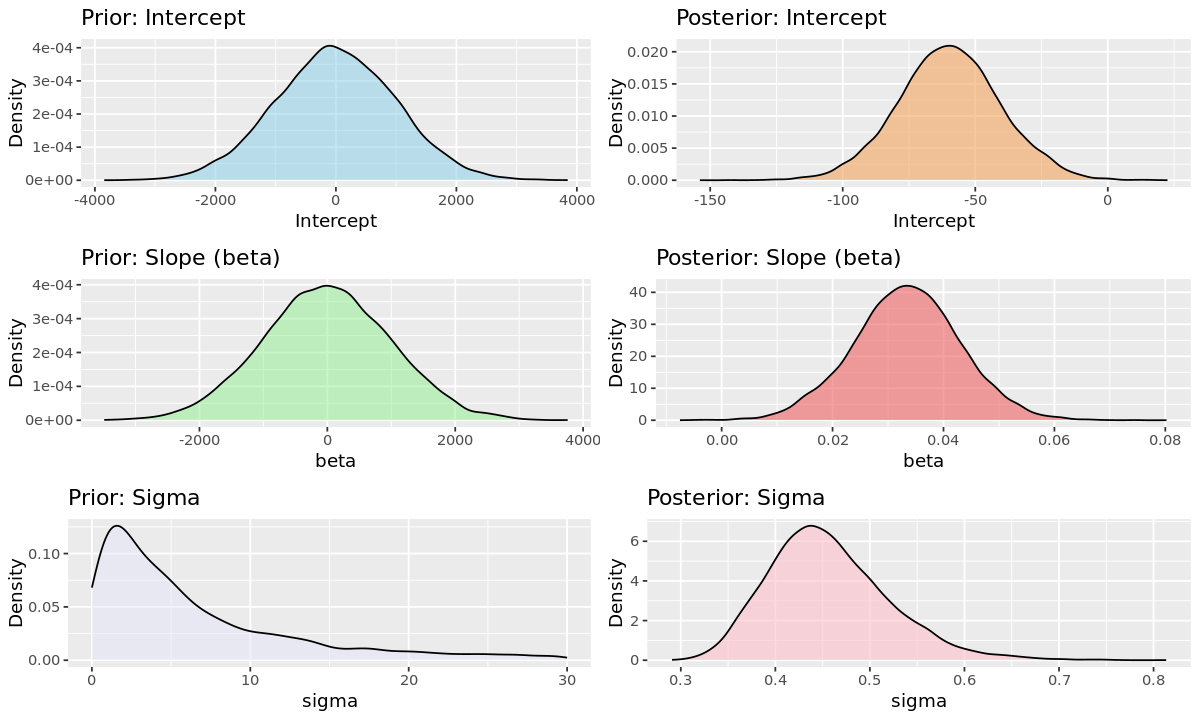

In [125]:
# Simulate 10,000 draws from the priors
set.seed(123)
prior_intercept <- rnorm(10000, mean = 0, sd = 1000)
prior_beta <- rnorm(10000, mean = 0, sd = 1000)
prior_sigma <- rcauchy(10000, location = 0, scale = 5)
prior_sigma <- prior_sigma[prior_sigma > 0]  # sigma must be > 0

# Extract posterior samples from the model
post <- posterior::as_draws_df(fit_linear)

# Plot 1: Prior - Intercept
p1 <- ggplot(data.frame(Intercept = prior_intercept), aes(x = Intercept)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  ggtitle("Prior: Intercept") + xlab("Intercept") + ylab("Density")

# Plot 2: Posterior - Intercept
p2 <- ggplot(post, aes(x = b_Intercept)) +
  geom_density(fill = "sandybrown", alpha = 0.6) +
  ggtitle("Posterior: Intercept") + xlab("Intercept") + ylab("Density")

# Plot 3: Prior - Slope (beta)
p3 <- ggplot(data.frame(beta = prior_beta), aes(x = beta)) +
  geom_density(fill = "lightgreen", alpha = 0.5) +
  ggtitle("Prior: Slope (beta)") + xlab("beta") + ylab("Density")

# Plot 4: Posterior - Slope (beta)
p4 <- ggplot(post, aes(x = b_Year)) +
  geom_density(fill = "indianred2", alpha = 0.6) +
  ggtitle("Posterior: Slope (beta)") + xlab("beta") + ylab("Density")

# Plot 5: Prior - Sigma
p5 <- ggplot(data.frame(sigma = prior_sigma), aes(x = sigma)) +
  geom_density(fill = "lavender", alpha = 0.5) +
  xlim(0, 30) +
  ggtitle("Prior: Sigma") + xlab("sigma") + ylab("Density")

# Plot 6: Posterior - Sigma
p6 <- ggplot(post, aes(x = sigma)) +
  geom_density(fill = "pink", alpha = 0.6) +
  ggtitle("Posterior: Sigma") + xlab("sigma") + ylab("Density")

# Arrange all six plots in 3 rows, 2 columns
grid.arrange(p1, p2,
             p3, p4,
             p5, p6,
             ncol = 2)


### • perform the same analysis using a constant regression

What This Model Does:
It estimates the average value of Avg_mean, assuming no dependence on Year.

The model assumes that Avg_mean is normally distributed around a constant mean (intercept) with some residual noise (sigma).

Mathematically:

Avg_mean
𝑖
∼
𝑁
(
𝜇
,
𝜎
)
where 
𝜇
=
Intercept
Avg_mean 
i
​
 ∼N(μ,σ)where μ=Intercept

In [126]:
fit_constant <- brm(
  formula = Avg_mean ~ 1,    # Likelihood for a linear fit, Constant model: only the intercept is estimated
  data = A_avg,
  family = gaussian(),  # Error likelihood
  prior = c(
    prior(normal(0, 10), class = "Intercept"),    # Constant value prior
    prior(cauchy(0, 5), class = "sigma")    # Noise prior
  ),
  iter = 5000, warmup = 1000, chains = 4, cores = 4 
)


Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: Avg_mean ~ 1 
   Data: A_avg (Number of observations: 30) 
  Draws: 4 chains, each with iter = 5000; warmup = 1000; thin = 1;
         total post-warmup draws = 16000

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     7.29      0.10     7.09     7.48 1.00    11254     9407

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.55      0.08     0.42     0.71 1.00     9288     9285

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

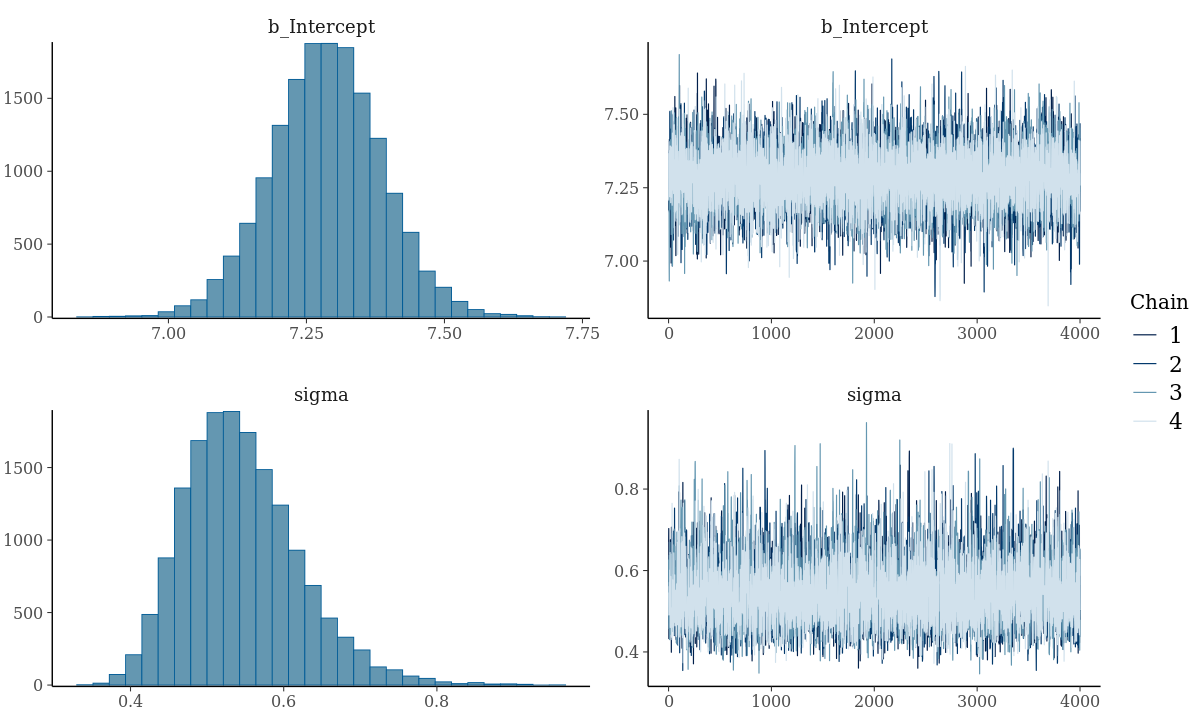

In [127]:
summary(fit_constant)
plot(fit_constant)


Using 10 posterior draws for ppc type 'dens_overlay' by default.



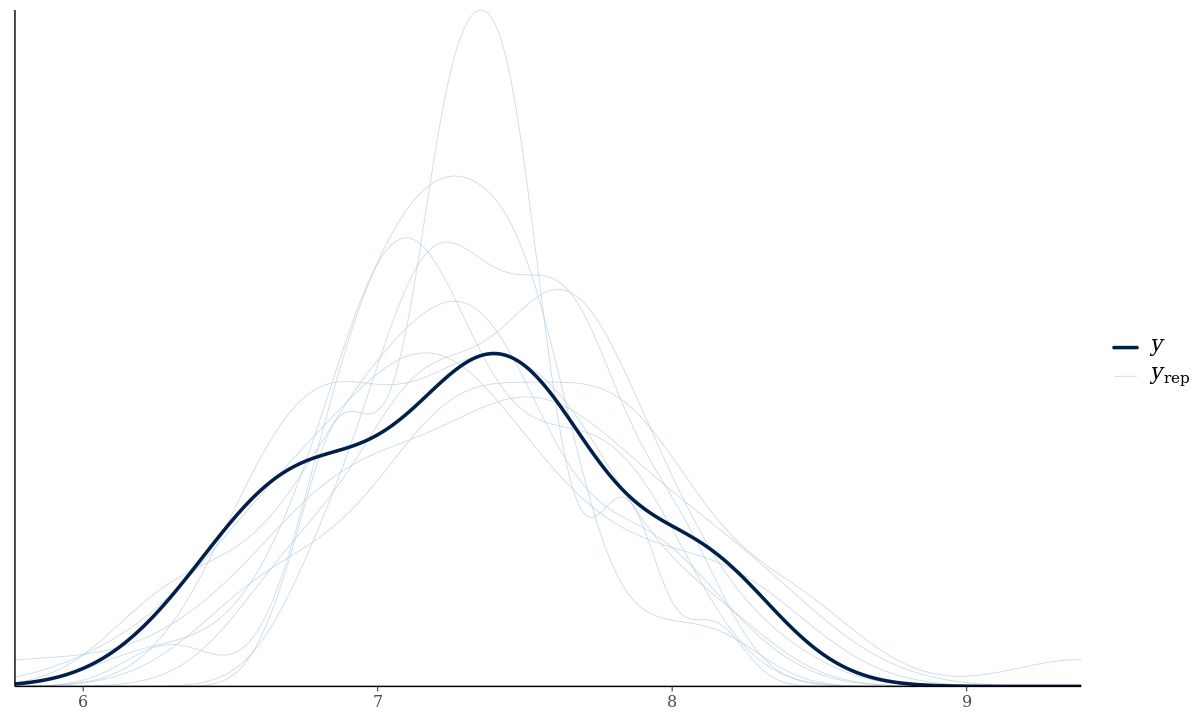

In [ ]:
pp_check(fit_constant)  # Posterior predictive check – how well does a flat model fit the data?
# conditional_effects(fit_constant)  # Shows posterior mean of the constant with credible interval
# fit linear has no predictors — it's a constant regression (intercept-only model). Since conditional_effects() is used to show how predictors affect the outcome, it doesn't know what to visualize because:


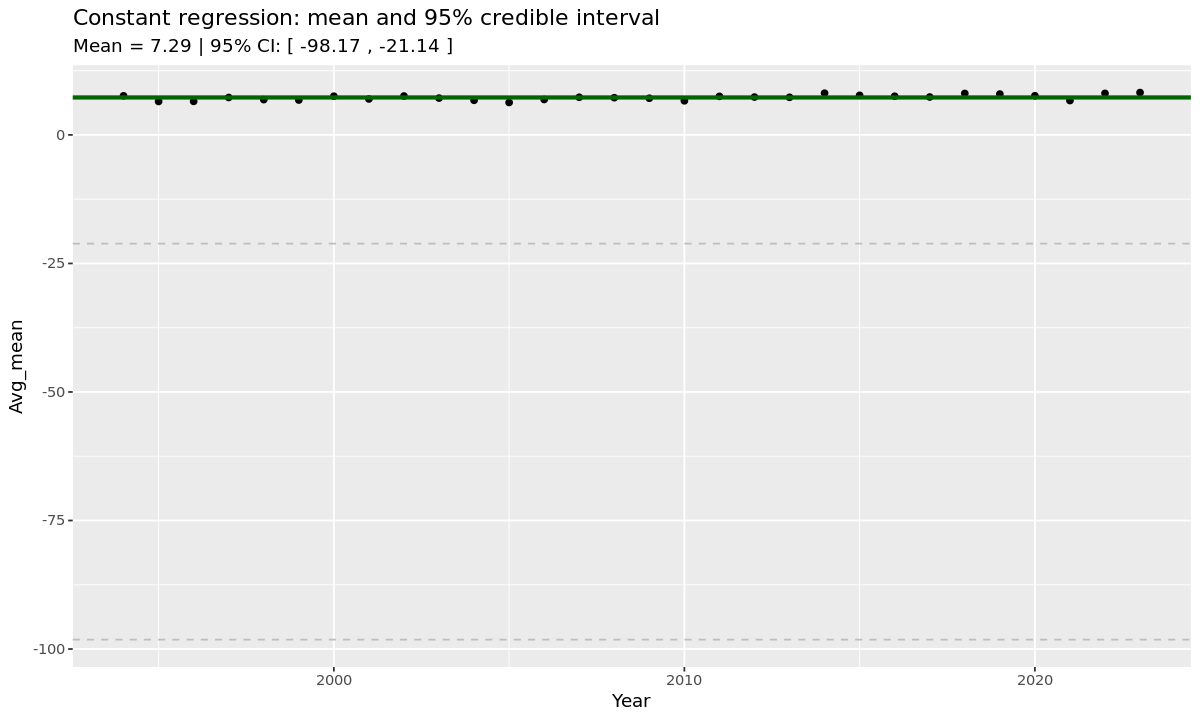

In [129]:
ci <- quantile(post$b_Intercept, probs = c(0.025, 0.975))

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(A_avg, aes(x = Year, y = Avg_mean)) +
  geom_point() +
  geom_hline(yintercept = mean_intercept, color = "darkgreen", size = 1.2) +
  geom_hline(yintercept = ci[1], linetype = "dashed", color = "gray") +
  geom_hline(yintercept = ci[2], linetype = "dashed", color = "gray") +
  labs(title = "Constant regression: mean and 95% credible interval",
       subtitle = paste("Mean =", round(mean_intercept, 2), 
                        "| 95% CI: [", round(ci[1], 2), ",", round(ci[2], 2), "]"),
       y = "Avg_mean")



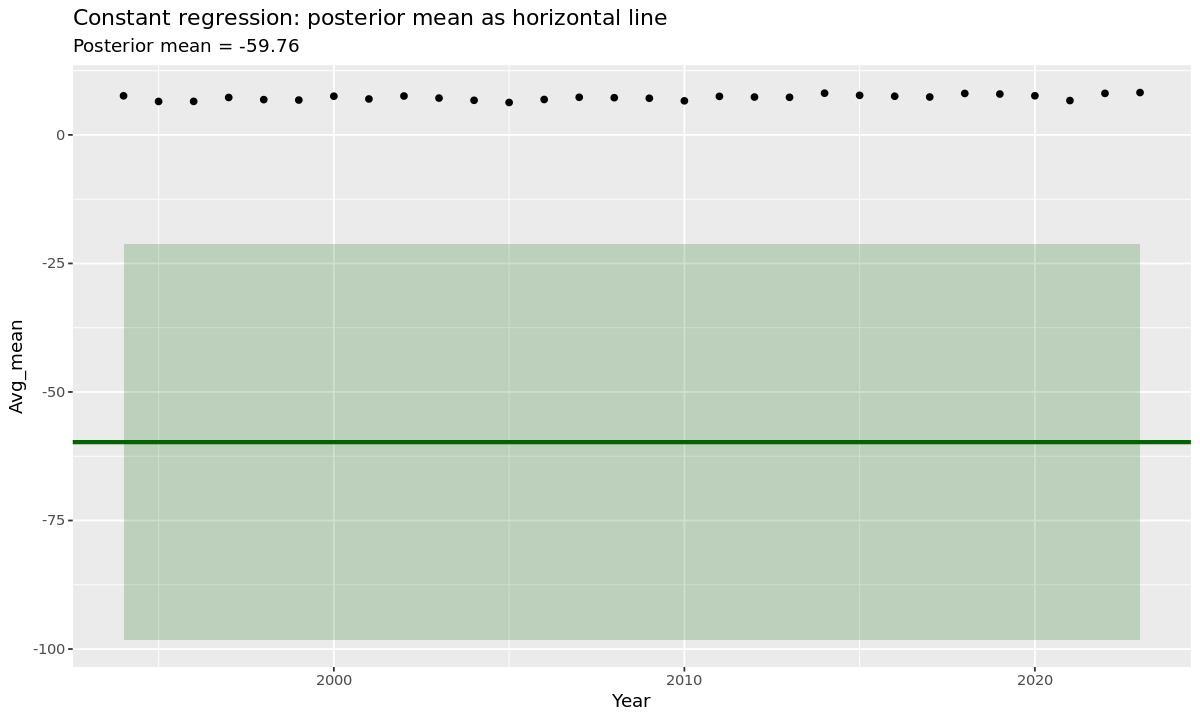

In [130]:
# Extract posterior mean of intercept
mean_intercept <- mean(post$b_Intercept)

options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(A_avg, aes(x = Year, y = Avg_mean)) +
  geom_point() +
  geom_hline(yintercept = mean_intercept, color = "darkgreen", size = 1.2) +
  labs(title = "Constant regression: posterior mean as horizontal line",
       subtitle = paste0("Posterior mean = ", round(mean_intercept, 2)),
       y = "Avg_mean") +
  geom_ribbon(data = A_avg, aes(x = Year, ymin = ci[1], ymax = ci[2]), 
              fill = "darkgreen", alpha = 0.2, inherit.aes = FALSE) 


Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Removed 545 rows containing non-finite outside the scale range
(`stat_density()`).”


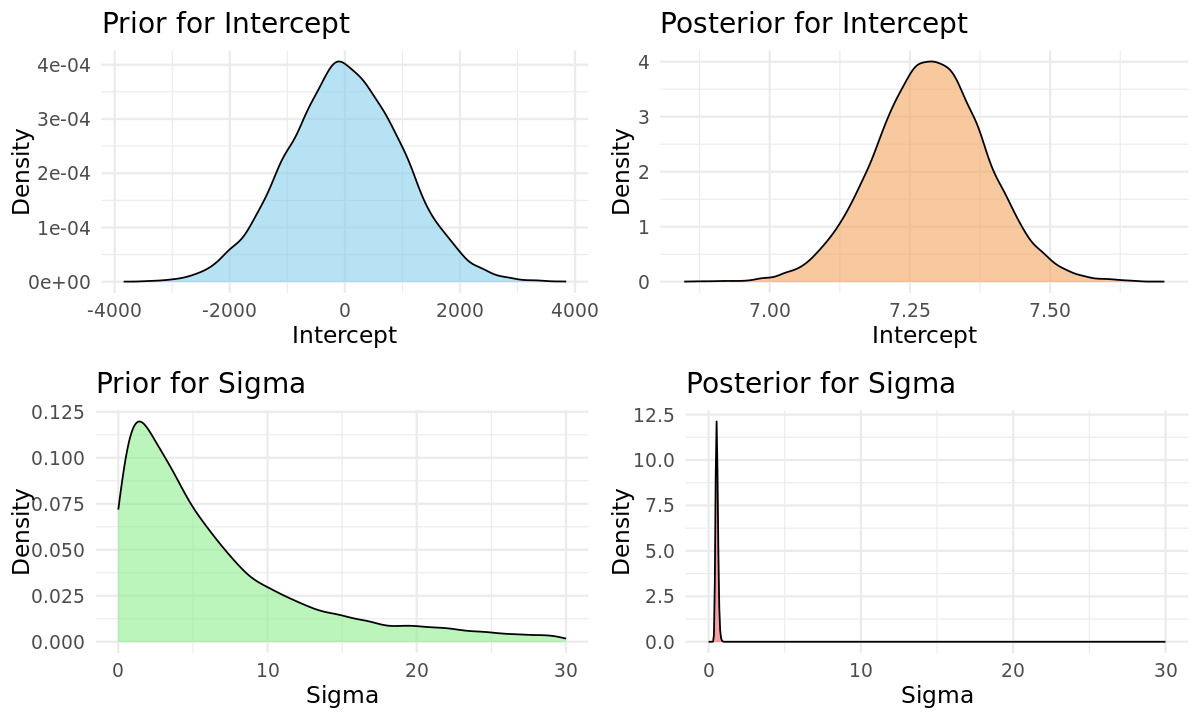

In [ ]:

# 1. Simulate Priors
set.seed(123)

prior_intercept <- rnorm(10000, mean = 0, sd = 1000)
prior_sigma <- rcauchy(10000, location = 0, scale = 5)
prior_sigma <- prior_sigma[prior_sigma > 0]  # sigma must be > 0

# 2. Extract Posterior Samples
post <- posterior_samples(fit_constant)

# 3. Create Plots

# Prior for Intercept
plot_prior_intercept <- ggplot(data.frame(value = prior_intercept), aes(x = value)) +
  geom_density(fill = "skyblue", alpha = 0.6) +
  ggtitle("Prior for Intercept") +
  xlab("Intercept") + ylab("Density") +
  theme_minimal(base_size = 14)

# Posterior for Intercept
plot_post_intercept <- ggplot(post, aes(x = b_Intercept)) +
  geom_density(fill = "sandybrown", alpha = 0.6) +
  ggtitle("Posterior for Intercept") +
  xlab("Intercept") + ylab("Density") +
  theme_minimal(base_size = 14)

# Prior for Sigma
plot_prior_sigma <- ggplot(data.frame(value = prior_sigma), aes(x = value)) +
  geom_density(fill = "lightgreen", alpha = 0.6) +
  xlim(0, 30) +
  ggtitle("Prior for Sigma") +
  xlab("Sigma") + ylab("Density") +
  theme_minimal(base_size = 14)

# Posterior for Sigma
plot_post_sigma <- ggplot(post, aes(x = sigma)) +
  geom_density(fill = "indianred2", alpha = 0.6) +
  xlim(0, 30) +
  ggtitle("Posterior for Sigma") +
  xlab("Sigma") + ylab("Density") +
  theme_minimal(base_size = 14)

# 4. Arrange plots: 2 rows, 2 columns
grid.arrange(
  plot_prior_intercept, plot_post_intercept,
  plot_prior_sigma, plot_post_sigma,
  ncol = 2
)


Bayes Factors as a principled way of performing Bayesian hypothesis testing.

You're computing the Bayes Factor (BF) between two models:
fit_linear: Linear model (Avg_mean ~ Year)

fit_constant: Constant model (Avg_mean ~ 1)


The Bayes Factor is defined as:

BF
10
=
𝑝
(
data
∣
𝑀
1
)
𝑝
(
data
∣
𝑀
0
)
BF 
10
​
 = 
p(data∣M 
0
​
 )
p(data∣M 
1
​
 )
​
 
Where:

𝑀
1
M 
1
​
 : linear model

𝑀
0
M 
0
​
 : constant model

𝑝
(
data
∣
𝑀
𝑖
)
p(data∣M 
i
​
 ): marginal likelihood of model 
𝑀
𝑖
M 
i
​
 , also called model evidence

So, you are comparing how well each model explains the data, averaging over all possible parameter values (weighted by the prior).


The bridge_sampler() function estimates the marginal likelihood 
𝑝
(
data
∣
𝑀
)
p(data∣M) of each model using bridge sampling, a numerical technique that works well with Stan models.

Then, bf() computes the Bayes Factor between the two models:

BF
10
=
evidence of model 1
evidence of model 0
=
𝑝
(
data
∣
𝑀
1
)
𝑝
(
data
∣
𝑀
0
)
BF 
10
​
 = 
evidence of model 0
evidence of model 1
​
 = 
p(data∣M 
0
​
 )
p(data∣M 
1
​
 )
​
 

H₀ (Null): The constant model 
𝑀
0
M 
0
​
  is true → Avg_mean ~ 1

H₁ (Alternative): The linear model 
𝑀
1
M 
1
​
  is true → Avg_mean ~ Year

So the Bayes Factor 
BF
10
BF 
10
​
  quantifies how much more likely the data are under the linear model compared to the constant model.

Interpretation of 
BF
10
BF 
10
​
 :
BF₁₀	Evidence for M₁ (linear) over M₀ (constant)
< 1	Evidence for constant model
1 to 3	Anecdotal evidence for linear model
3 to 10	Moderate evidence
10 to 30	Strong evidence
\> 100	Decisive evidence

In [132]:
# Compare using LOO
loo_linear <- loo(fit_linear)
loo_constant <- loo(fit_constant)

loo_compare(loo_linear, loo_constant)  # Or: compare(loo_linear, loo_constant)

# Optionally, compute Bayes Factor
library(bridgesampling)
bridge_linear <- bridge_sampler(fit_linear)
bridge_constant <- bridge_sampler(fit_constant)

bf(bridge_linear, bridge_constant)


elpd_diff se_diff  elpd_loo  se_elpd_loo p_loo   se_p_loo 
fit_linear    0.000000 0.000000 -20.10335 4.105014    3.11483 1.0137678
fit_constant -4.294369 3.902623 -24.39772 2.970575    1.52822 0.2936354
             looic    se_looic
fit_linear   40.20670 8.210027
fit_constant 48.79544 5.941149

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


Estimated Bayes factor in favor of bridge_linear over bridge_constant: 0.21290

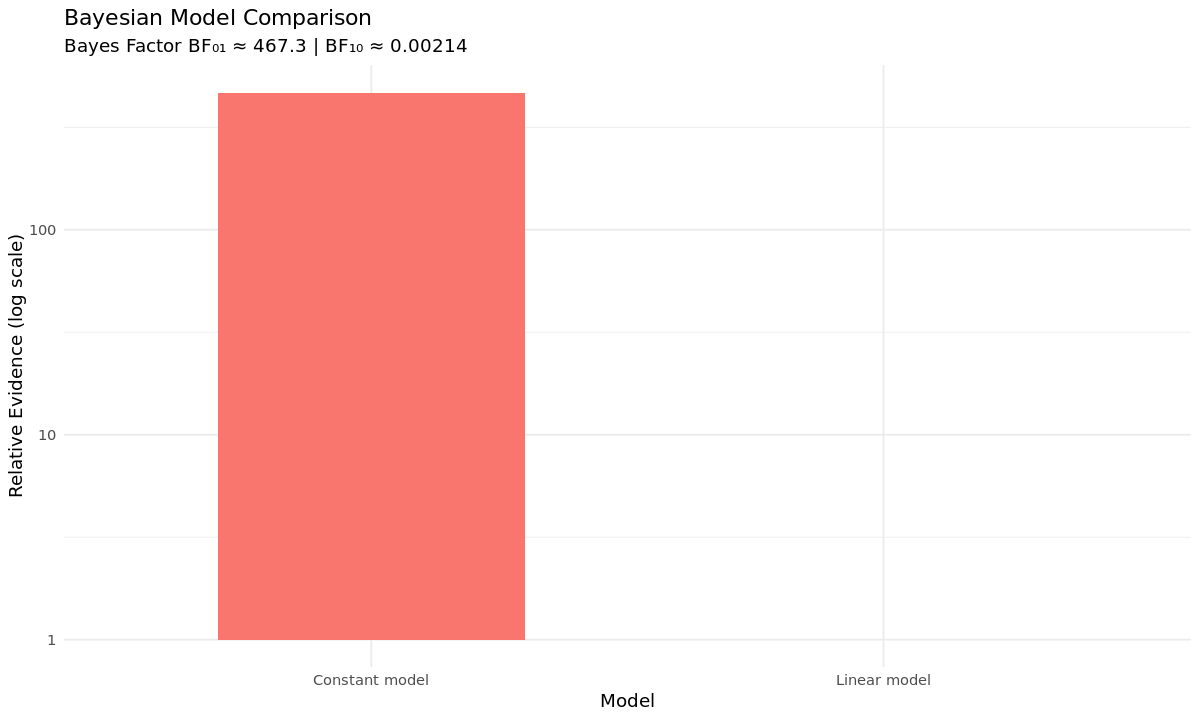

In [133]:

BF10 <- 0.00214
BF01 <- 1 / BF10

df <- data.frame(
  Model = c("Linear model", "Constant model"),
  Evidence = c(1, BF01)
)

ggplot(df, aes(x = Model, y = Evidence, fill = Model)) +
  geom_col(width = 0.6, show.legend = FALSE) +
  scale_y_log10() +  # log scale for visibility
  labs(title = "Bayesian Model Comparison",
       subtitle = paste("Bayes Factor BF₀₁ ≈", round(BF01, 1), 
                        "| BF₁₀ ≈", round(BF10, 5)),
       y = "Relative Evidence (log scale)") +
  theme_minimal()


Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


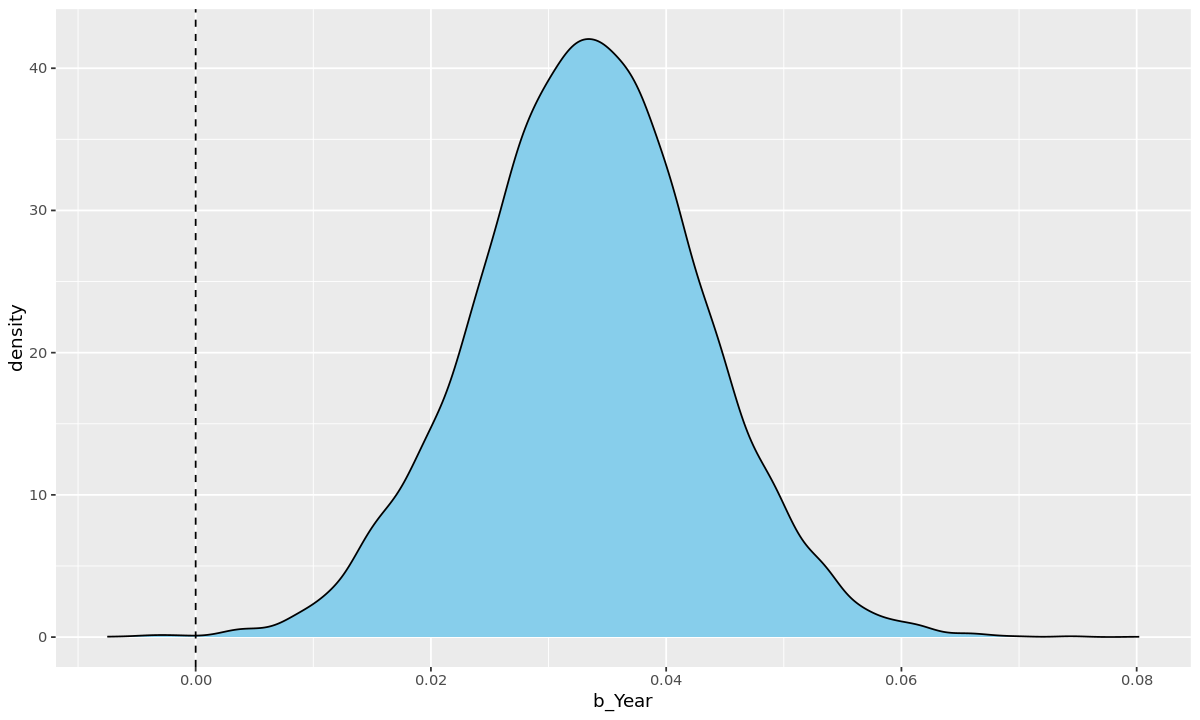

In [134]:
# perhaps, The posterior for the slope (b_Year) includes 0, so there's not strong support for an actual trend.
# If it hugs zero, then the data don’t strongly support a trend under this prior. If it’s clearly away from zero, then the data do support it — and the prior is likely the issue.
post <- posterior_samples(fit_linear)
ggplot(post, aes(x = b_Year)) +
  geom_density(fill = "skyblue") +
  geom_vline(xintercept = 0, linetype = "dashed")


In [135]:
# -----------------------------------------------------------
# Bayesian Hypothesis Test: Is the slope (b_Year) > 0?
# Model: fit_linear (assumed to be already fitted with brm)
# -----------------------------------------------------------

# Load required package
library(brms)

# Extract posterior samples from the model
post <- posterior_samples(fit_linear)

# Compute the posterior probability that the slope is greater than 0
# This directly corresponds to P(b > 0 | data)
prob_b_greater_0 <- mean(post$b_Year > 0)

# Compute the complementary probability (slope ≤ 0)
prob_b_less_equal_0 <- 1 - prob_b_greater_0

# Report results
cat("Bayesian Hypothesis Test:\n")
cat("H₀: Slope ≤ 0 (no increasing trend)\n")
cat("H₁: Slope > 0 (increasing trend)\n\n")
cat("Posterior probability P(b > 0 | data) =", round(prob_b_greater_0, 4), "\n")
cat("Posterior probability P(b ≤ 0 | data) =", round(prob_b_less_equal_0, 4), "\n\n")

# Optional conclusion based on confidence level
if (prob_b_greater_0 > 0.95) {
  cat("Conclusion: Strong evidence in favor of an increasing trend (H₁)\n")
} else if (prob_b_greater_0 > 0.9) {
  cat("Conclusion: Moderate evidence for an increasing trend (H₁)\n")
} else if (prob_b_greater_0 > 0.75) {
  cat("Conclusion: Weak evidence for an increasing trend\n")
} else {
  cat("Conclusion: No strong evidence for an increasing trend\n")
}


Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


Bayesian Hypothesis Test:
H₀: Slope ≤ 0 (no increasing trend)
H₁: Slope > 0 (increasing trend)

Posterior probability P(b > 0 | data) = 0.9992 
Posterior probability P(b ≤ 0 | data) = 8e-04 

Conclusion: Strong evidence in favor of an increasing trend (H₁)


1. Correlation Between Posterior Slopes
This answers: "Do the stations exhibit similar temperature trends over time?"



In [136]:
# Example: extract posterior slopes from brms fits
slope_A <- posterior_samples(fit_A)$b_Year
slope_B <- posterior_samples(fit_B)$b_Year
slope_C <- posterior_samples(fit_C)$b_Year
slope_D <- posterior_samples(fit_D)$b_Year

slopes_df <- data.frame(A = slope_A, B = slope_B, C = slope_C, D = slope_D)

cor(slopes_df)  # Correlation matrix between trends


Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


ERROR: Error: object 'fit_A' not found


2. Correlation Between Fitted Values Over Time
This answers: "Do the yearly modeled temperatures follow similar trajectories?"

Extract fitted values (posterior mean estimates) for each station across years.

Merge by year and compute correlation across stations.

You’ll see if stations’ modeled temperature evolutions are similar, regardless of slope.

In [ ]:
# Assuming same years for all stations
years <- A$Year  # Replace with actual year column

fitted_df <- data.frame(
  Year = years,
  A = fitted(fit_A)[, "Estimate"],
  B = fitted(fit_B)[, "Estimate"],
  C = fitted(fit_C)[, "Estimate"],
  D = fitted(fit_D)[, "Estimate"]
)

cor(fitted_df[, -1])  # Correlation of modeled annual temperatures


ERROR: Error: object 'fit_A' not found


Raw data correlation for annual averages:

In [138]:
# Assuming A, B, C, D are your station data frames with annual Avg_mean
combined <- data.frame(
  Year = A$Year,
  A = A$Avg_mean,
  B = B$Avg_mean,
  C = C$Avg_mean,
  D = D$Avg_mean
)

cor(combined[, -1])  # Classic Pearson correlation on raw yearly averages


Warning message:
“Unknown or uninitialised column: `Avg_mean`.”


ERROR: Error: object 'B' not found


In [1]:
plot_constant_fit_from_brm <- function(fit, df, station_name, fit_const) {
  df$fit_const <- predict(fit_const)

  # Extract posterior draws
  post <- as_draws_df(fit)
  intercept_samples <- post$b_Intercept
  
  # Summary statistics
  mean_intercept <- mean(intercept_samples)
  ci <- quantile(intercept_samples, probs = c(0.025, 0.975))
  
  # Unique years (to draw the flat line across time)
  ribbon_df <- data.frame(
    Year = unique(df$Year),
    Mean = mean_intercept,
    CI_low = ci[1],
    CI_high = ci[2]
  )
  
  # Plot
  ggplot(df, aes(x = Year, y = Avg_mean)) +
    geom_point(color = "black", size = 2, alpha = 0.7) +
    geom_line(aes(y = fit_const), color = "red", size = 2.2) +

    geom_line(data = ribbon_df, aes(x = Year, y = Mean), color = "blue", size = 1.2) +
    geom_ribbon( data = ribbon_df, aes(x = Year, ymin = CI_low, ymax = CI_high), inherit.aes = FALSE, fill = "blue", alpha = 0.2)+    labs(
      title = paste("Constant Model Fit vs Data –", station_name),
      subtitle = "Blue = Posterior mean | Shaded = 95% credible interval",
      x = "Year",
      y = "Average Temperature (°C)"
    ) +
    theme_minimal(base_size = 14)
}

